# Lista 1: Q1

### Fix the notebook path for this project

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

### Imports

In [2]:
import numpy as np
from neuralnetworks.neuralnetwork import NeuralNetwork
from datasets.e1q1 import createDataSetE1Q1
from datasets.util import unisonShuffledCopies
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neural_network import MLPClassifier

### Set a random seed

In [3]:
SEED = 42
np.random.seed(seed=SEED)

### Create the dataset

In [4]:
X, y = createDataSetE1Q1(1000, 0.1)

### Split into train and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)

### Lets check some training set rows

In [6]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[0.99942124472503, 0.03282492524372184, -0.01647919526291273], [1.0298783235773665, 1.0497934110533338, 0.985071181545171], [-0.0023099893532030013, 0.021833117537200398, -0.02526596841809167], [-0.015791825128409254, 0.03212573046720129, -0.03893682630447928], [-0.02975194398347626, 1.045807348011938, 0.9867940751302084]] 

Y:  [[4], [7], [0], [0], [3]]


## SOLUTION 1: Single Perceptron, 1 layer

TRAINING DETAILS:
NETWORK STATE AFTER TRAINING:
 {'activation': 'linear',
 'activation_last_layer': 'linear',
 'architecture': [1],
 'autoEncode': False,
 'inputs': 3,
 'isClassification': True,
 'layers': [[{'activation': 'linear', 'bias': 0.0043231115510867345, 'inputs': 3, 'newBias': 0.0043231115510867345, 'newWeights': array([ 3.99201037,  1.95986844,  0.99861989]), 'weights': array([ 3.99201037,  1.95986844,  0.99861989])}]],
 'lr': 0.1,
 'momentum': 0} 

TEST DATASET PREDICTIONS: 
y_test_true:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15) 
y_test_pred:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15)

CONFUSION MATRIX:
 [[ 8  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0 11]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.0

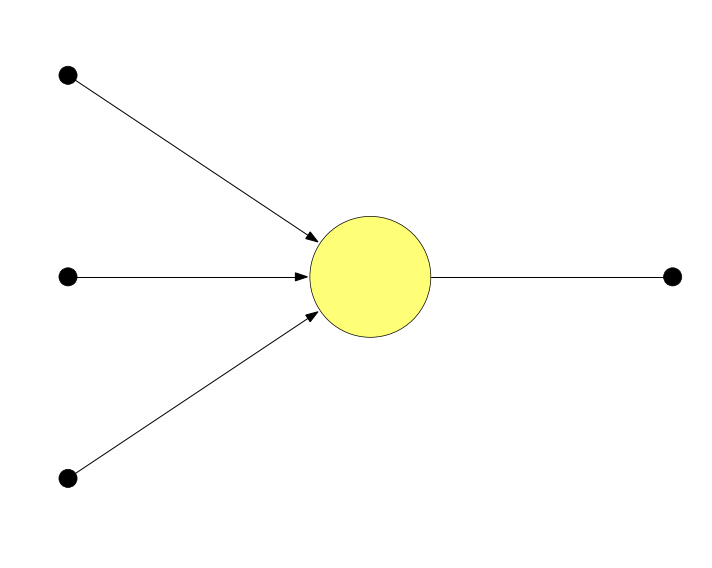

In [7]:
model = NeuralNetwork(3, [1], isClassification=True, lr=0.1, autoEncode=False, activation='linear', activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(x=X_train, y=y_train, epochs=100, verbose=False)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## SOLUTION 2: 8 Perceptrons, 1 layer

TRAINING DETAILS:
NETWORK STATE AFTER TRAINING:
 {'activation': 'linear',
 'activation_last_layer': 'linear',
 'architecture': [8],
 'autoEncode': True,
 'encoder': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False),
 'inputs': 3,
 'isClassification': True,
 'layers': [[{'activation': 'linear', 'bias': 0.11274474972158595, 'inputs': 3, 'newBias': 0.11274474972158595, 'newWeights': array([-0.05860529, -0.05790642, -0.05292186]), 'weights': array([-0.05860529, -0.05790642, -0.05292186])},
             {'activation': 'linear', 'bias': 1.2123643451736055e-13, 'inputs': 3, 'newBias': 1.2123643451736055e-13, 'newWeights': array([-0.03670306, -0.11147707,  0.36226026]), 'weights': array([-0.03670306, -0.11147707,  0.36226026])},
             {'activation': 'linear', 'bias': 7.1253643507213042e-05, 'inputs': 3, 'newBias': 7.1253643507213042e-05, 'newWeights': array([-0.17352062,  0.3666981 , -0.18268495]), 'wei

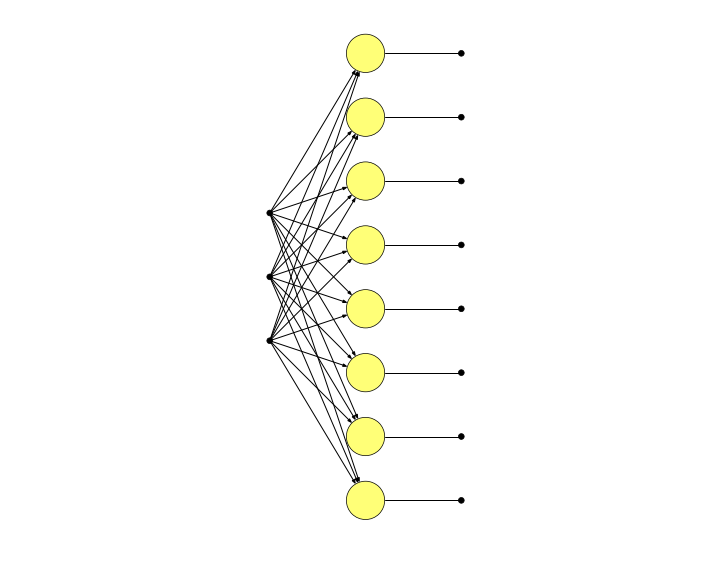

In [8]:
model = NeuralNetwork(3, [8], isClassification=True, lr=0.1, autoEncode=True, activation='linear', activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(x=X_train, y=y_train, epochs=100, verbose=False)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## SOLUTION 3: (4, 1) Perceptrons, 2 layer

TRAINING DETAILS:
NETWORK STATE AFTER TRAINING:
 {'activation': 'sigmoid',
 'activation_last_layer': 'linear',
 'architecture': [3,
                  1],
 'autoEncode': False,
 'inputs': 3,
 'isClassification': True,
 'layers': [[{'activation': 'sigmoid', 'bias': 0.00055711453519635256, 'inputs': 3, 'newBias': 0.00055711453519635256, 'newWeights': array([ 1.33834489, -0.74455773,  1.40145053]), 'weights': array([ 1.33834489, -0.74455773,  1.40145053])},
             {'activation': 'sigmoid', 'bias': 2.5821435860573443e-12, 'inputs': 3, 'newBias': 2.5821435860573443e-12, 'newWeights': array([-0.36313506, -1.87864604, -0.25961174]), 'weights': array([-0.36313506, -1.87864604, -0.25961174])},
             {'activation': 'sigmoid', 'bias': 0.026084503726876172, 'inputs': 3, 'newBias': 0.026084503726876172, 'newWeights': array([ 4.01256369, -0.41211395, -2.15754524]), 'weights': array([ 4.01256369, -0.41211395, -2.15754524])}],
            [{'activation': 'linear', 'bias': 8.69437558055179e

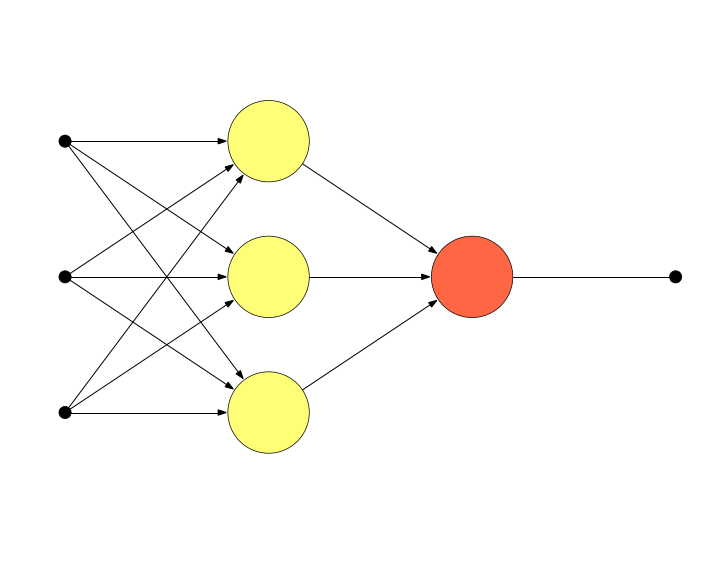

In [9]:
model = NeuralNetwork(3, [3, 1], isClassification=True, lr=0.1, autoEncode=False, activation='sigmoid', activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(x=X_train, y=y_train, epochs=100, verbose=False)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## SOLUTION 4: MLP Classifier implementation using sklearn, 1 layer, 8 outputs

In [10]:
clf = MLPClassifier(activation='identity', batch_size=1, shuffle=False, 
                    learning_rate='constant', max_iter=100, momentum=0, solver='sgd', nesterovs_momentum=False,
                    learning_rate_init=0.1, alpha=0, hidden_layer_sizes=(), random_state=SEED, verbose=False)

clf.fit(X_train, y_train)

print("WEIGTHS:", [coef.shape for coef in clf.coefs_], " | ", clf.coefs_)
print("LAYERS:", clf.n_layers_ )
print("BIAS VECTOR:", clf.intercepts_)

y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = clf.predict(X_test)

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

WEIGTHS: [(3, 8)]  |  [array([[-5.12063534, -6.51169221, -6.58498527, -7.62044666,  8.36278986,
         6.31647373,  6.19980943,  4.79942542],
       [-5.12367875, -6.557957  ,  8.33215462,  6.26368981, -6.5925448 ,
        -7.69043164,  6.18999274,  4.7499634 ],
       [-5.32479371,  8.17792621, -6.65774   ,  6.08490197, -6.74556118,
         6.04526376, -7.76058831,  4.64740217]])]
LAYERS: 2
BIAS VECTOR: [array([ 8.07101049,  1.57188908,  1.56425882, -2.65684476,  1.53518989,
       -2.63722896, -2.56307504, -5.81268683])]
TEST DATASET PREDICTIONS: 
y_test_true:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15) 
y_test_pred:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15)

CONFUSION MATRIX:
 [[ 8  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0 12  0  0]
 [ 0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0 11]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       